# EDA Task 8

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
flights = pd.read_csv('data/flights_10000.csv', index_col=0)
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,14683,SAT,...,822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-10,UA,UA,UA,206,UA,N68811,206,13930,ORD,...,1005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-18,AA,AA_CODESHARE,AA,4221,MQ,N694AE,4221,12891,LAW,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-11-25,UA,UA_CODESHARE,UA,4822,ZW,NaN,4822,14685,SAV,...,773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-24,DL,DL,DL,957,DL,N693DL,957,11433,DTW,...,1960.0,0.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN,NaN


American Airlines defines:
* short-/medium-haul flights as being less than 3,000 mi (2,600 nmi; 4,800 km) and 
* long-haul as either being more than 3,000 mi (2,600 nmi; 4,800 km) or being the New York–Los Angeles and New York–San Francisco routes.[8]
    
United Airlines defines:
* short-haul flights as being less than 700 mi (610 nmi; 1,100 km)[9]
* long-haul flights as being greater than 3,000 mi (2,600 nmi; 4,800 km).[10]
    
https://en.wikipedia.org/wiki/Flight_length

In [4]:
hauls = flights[['distance','crs_dep_time']]
hauls.head()

,distance,crs_dep_time
0,822.0,705
1,1005.0,800
2,140.0,1034
3,773.0,2200
4,1960.0,841


In [5]:
#define lengths: short = 700, med = 3000, long is else
hauls['time_length_categ'] = 'long'                                    #start with setting all to long
hauls.loc[(hauls['distance'] < 701), 'time_length_categ'] = 'short'
hauls.loc[(hauls['distance'] > 700) & (hauls['distance'] < 3001), 'time_length_categ'] = 'medium'

In [7]:
hauls[['crs_dep_time','time_length_categ']].groupby(by = 'time_length_categ').count()

,crs_dep_time
time_length_categ,
long,8
medium,4259
short,5733


Looks like there are only 8 long haul flights in our 10 000 flights df

In [8]:
#let's investigate the 8 long flights
hauls[hauls['time_length_categ'] == 'long']['crs_dep_time']

833     1000
2202    2050
2874    1000
3821    2009
4820    1644
7101     935
9345    1625
9620     845
Name: crs_dep_time, dtype: int64

In [12]:
#create new hr col to group
hauls['hr'] = [dt.time(hour=x//100).strftime("%H:%M") for x in hauls['crs_dep_time']]

In [14]:
#let's group by category and hr and count the frequency
hauls_plt = hauls[['hr','time_length_categ']].groupby(by = ['time_length_categ', 'hr']).size()

In [17]:
#take category and hr out of the index and rename the count column. 
#sort by hr so we can plot nicely
hauls_plt = hauls_plt.reset_index().rename({0: 'hr_count'}, axis = 1).sort_values('hr')

<AxesSubplot:xlabel='hr', ylabel='hr_count'>

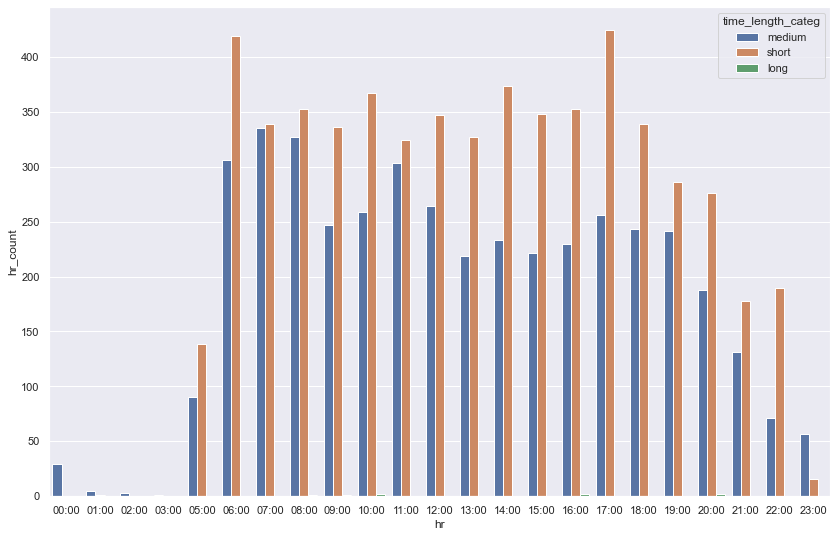

In [19]:
sns.set(rc={'figure.figsize':(14,9)})
sns.barplot(data=hauls_plt, x='hr', y='hr_count', hue='time_length_categ')

<AxesSubplot:xlabel='hr', ylabel='hr_count'>

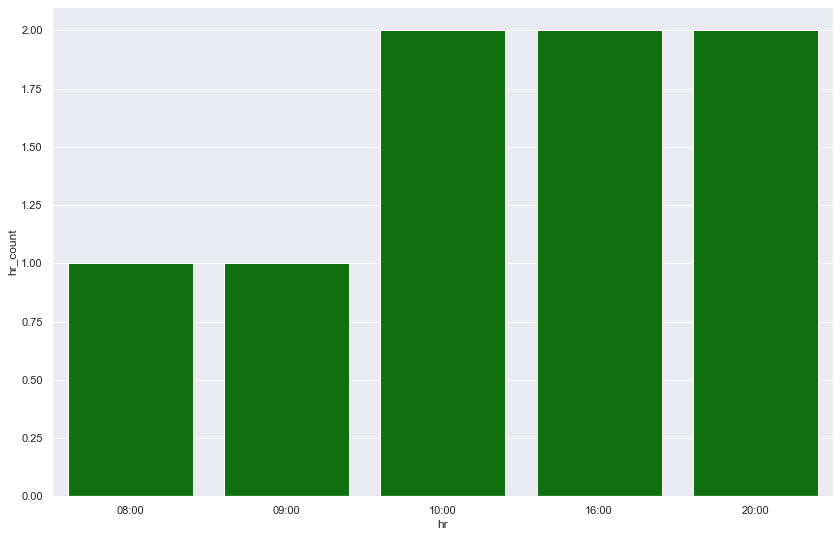

In [26]:
sns.barplot(data=hauls_plt[hauls_plt['time_length_categ'] == 'long'], x ='hr', y='hr_count', color = 'green' )
#add titles

In [23]:
results = hauls_plt.groupby(by = ['time_length_categ', 'hr'], as_index = False).value_counts()
results.sort_values(by = ['hr_count'], ascending = False).groupby(by = 'time_length_categ').head(1).drop('count', axis = 1)

,time_length_categ,hr,hr_count
41,short,17:00,424
11,medium,07:00,335
4,long,20:00,2


In [22]:
#there are multiple answered for long haul as 3 of the hours have a count of 2 - fine tune this?